# Read TESEO's forcing files

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IHCantabria/pyteseo/blob/main/docs/notebooks/02_read_forcings.ipynb)

## Install pyTESEO
- If you are running this notebook from `Google colab` uncomment and run `!pip install pyteseo && pyteseo-tests` in the cell below. 
Doing this you will install `pyteseo` from `pypi` repository and run `pyteseo-tests` to check the installation (all tests have to succeed).

- If you are using this notebook in your own local machine you need to install the library from the local repo `pip install .` or pypi `pip install pyteseo`.

In [1]:
# !pip install pyteseo && pyteseo-tests

## Read TESEO's forcings files (currents and winds) and plot them.


In [2]:
import warnings

warnings.simplefilter(action="ignore")

1. Define Paths

In [3]:
from pathlib import Path
import pyteseo.tests as tests_

data_path = Path(tests_.__file__).parent / "data"
lstcurr_path = data_path / "lstcurr.pre"
lstwinds_path = data_path / "lstwinds.pre"


WARNING - .env file has not been loaded!


2. Read bathymetry and coastline from TESEO's format files

In [4]:
from pyteseo.io.forcings import read_forcing

currents_df = read_forcing(lstcurr_path, forcing_type="currents")
winds_df = read_forcing(lstwinds_path, forcing_type="winds")
winds_df.head(5)

time       lon       lat         u         v
0   0.0  9.618706  43.98785 -3.765736  0.509148
1   0.0  9.618706  44.11285 -3.765736  0.509148
2   0.0  9.618706  44.23785 -3.765736  0.509148
3   0.0  9.743706  43.98785 -3.765736  0.509148
4   0.0  9.743706  44.11285 -3.765736  0.509148

3. Plot velocity fields

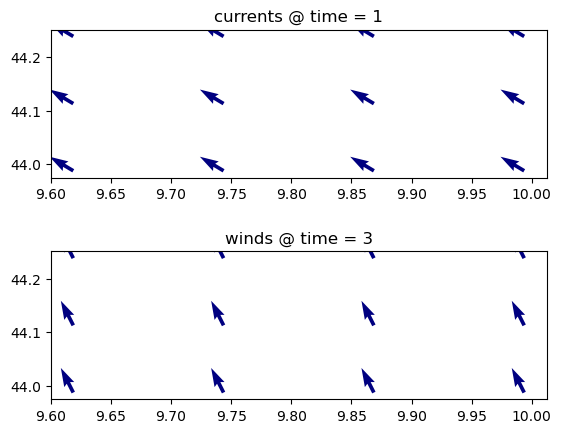

In [5]:
from matplotlib import pyplot as plt
import numpy as np


currents_df["mod"] = np.sqrt(currents_df.u**2 + currents_df.v**2)
winds_df["mod"] = np.sqrt(winds_df.u**2 + winds_df.v**2)

currents_time = 1
currents = currents_df.loc[currents_df["time"] == currents_time]

winds_time = 3
winds = winds_df.loc[winds_df["time"] == winds_time]

fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.title(f"currents @ time = {currents_time}")
q1 = ax1.quiver(
    currents["lon"],
    currents["lat"],
    currents["u"],
    currents["v"],
    currents["mod"],
    cmap="jet",
)

time = 3
ax2 = fig.add_subplot(212)
plt.title(f"winds @ time = {winds_time}")
q2 = ax2.quiver(
    winds["lon"],
    winds["lat"],
    winds["u"],
    winds["v"],
    winds["mod"],
    cmap="jet",
)

plt.subplots_adjust(hspace=0.5)